In [158]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import os 
import numpy as np

dirname=os.path.dirname(os.path.abspath('__file__'))
filename=os.path.join(dirname,'./data/recipesData.json')
df=pd.read_json(filename)

In [159]:
df.keys()

Index(['_id', 'ratingData', 'name', 'datePublished', 'description',
       'recipeYield', 'recipeIngredient', 'recipeInstructions',
       'recipeCategory', 'nutrition', 'category', 'Tatcategory', 'RecId',
       'link', 'rating', 'img', 'prepTimeVal', 'cookTimeval', 'totalTimeVal',
       'ratingCount', 'bestRating', 'worstRating', 'video'],
      dtype='object')

In [160]:
df.head(5)

,_id,ratingData,name,datePublished,description,recipeYield,recipeIngredient,recipeInstructions,recipeCategory,nutrition,category,Tatcategory,RecId,link,rating,img,prepTimeVal,cookTimeval,totalTimeVal,ratingCount,bestRating,worstRating,video
0,{'$oid': '5fc3b88113f48bef0f019a31'},"[{'rating': 5, 'count': 5, 'percentage': 50}, {'rating': 4, 'count': 4, 'percentage': 40}, {'rating': 3, 'count': 1, 'percentage': 10}, {'rating': 2, 'count': 0, 'percentage': 0}, {'rating': 1, 'count': 0, 'percentage': 0}]",Hot Artichoke Dip with Green Chiles,2018-03-21T16:16:59.000Z,Green chile peppers and garlic spice up this easy and delicious hot dip. It's great to serve while your guests are enjoying wine and waiting on the main course. It goes very well with tortilla chips.,4 cups,"[½ (16 ounce) jar creamy salad dressing, 1 clove garlic, minced, 1 cup grated Parmesan cheese, 1 (4 ounce) can chopped green chile peppers, 1 (14 ounce) can marinated artichoke hearts, drained and chopped, 3 green onions, chopped, 1 tomato, chopped]","[{'text': 'Preheat oven to 350 degrees F (175 degrees C). '}, {'text': 'In a medium bowl, mix the creamy salad dressing, garlic, Parmesan cheese, green chile peppers and artichoke hearts. '}, {'text': 'Transfer the mixture to a small baking dish. Bake uncovered in the preheated oven 30 minutes, or until bubbly and lightly brown. Garnish with green onions and tomato. '}]","[Appetizers and Snack Recipes, Dips and Spreads Recipes, Cheese Dips and Spreads Recipes, Hot Cheese Dip Recipes]","{'calories': '47.4 calories', 'carbohydrateContent': '2.8 g', 'cholesterolContent': '5.1 mg', 'fatContent': '3.4 g', 'fiberContent': '0.6 g', 'proteinContent': '1.7 g', 'saturatedFatContent': '0.8 g', 'servingSize': None, 'sodiumContent': '193.5 mg', 'sugarContent': '1.2 g', 'transFatContent': None, 'unsaturatedFatContent': None}",appetizers and snacks,cheese appetizers,23945,https://www.allrecipes.com/recipe/23945/hot-artichoke-dip-with-green-chiles/,4.400,https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fimages.media-allrecipes.com%2Fuserphotos%2F3129045.jpg,5,30,35,10,5,1,NaN
1,{'$oid': '5fc3b88113f48bef0f019a33'},"[{'rating': 5, 'count': 8, 'percentage': 62}, {'rating': 4, 'count': 4, 'percentage': 31}, {'rating': 3, 'count': 0, 'percentage': 0}, {'rating': 2, 'count': 1, 'percentage': 8}, {'rating': 1, 'count': 0, 'percentage': 0}]",Party Plentiful Guacamole,2019-07-10T07:00:48.000Z,This is a recipe my Mom always brings to the family get togethers. It's always requested and eaten. Most of the time she uses the cottage cheese/cream cheese mixture as directed and others she just uses two packages of cream cheese.,9 cups,"[4 avocados - peeled, pitted and diced, 1 (8 ounce) package cream cheese, softened, 2 (16 ounce) containers cottage cheese, 1 onion, chopped, 1 (3 ounce) can chopped green chile peppers, ¼ cup salsa, 2 tablespoons garlic salt, 2 tablespoons fresh lemon juice, salt and pepper to taste]","[{'text': 'Place the avocados into a mixing bowl; mash with a fork. Mix in cream cheese, cottage cheese, onion, chili peppers, and salsa. Season with garlic salt, lemon juice, and salt and pepper. '}]","[Appetizers and Snack Recipes, Dips and Spreads Recipes, Guacamole Recipes]","{'calories': '86 calories', 'carbohydrateContent': '3.4 g', 'cholesterolContent': '10.6 mg', 'fatContent': '6.6 g', 'fiberContent': '1.6 g', 'proteinContent': '4.1 g', 'saturatedFatContent': '2.6 g', 'servingSize': None, 'sodiumContent': '461.4 mg', 'sugarContent': '0.5 g', 'transFatContent': None, 'unsaturatedFatContent': None}",appetizers and snacks,cheese appetizers,161178,https://www.allrecipes.com/recipe/161178/party-plentiful-guacamole/,4.462,https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fimages.media-allrecipes.com%2Fuserphotos%2F1008837.jpg,15,0,15,13,5,1,NaN
2,{'$oid': '5fc3b88113f48bef0f019a36'},"[{'rating': 5, 'count': 11, 'percentage': 58}, {'rating': 4, 'count': 6, 'percentage': 32}, {'rating': 3, 'count': 2, 'percentag

<h2>SECTION 1</h2>

In [161]:
from surprise import Dataset
from surprise import Reader

In [162]:
dfRatings = pd.read_csv('./data/ratings.csv')
reader = Reader(rating_scale=(1, 5))
dfRatings = dfRatings.iloc[0:500000]
# Loads Pandas dataframe and take 500 thousand rows to not overload memory
data = Dataset.load_from_df(dfRatings[["userId", "recipeId", "rating"]], reader)

In [163]:
from surprise import KNNWithMeans

# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": True,  # Compute  similarities between users
    "min_support": 4 #minimum number of common items needed between users to consider them for similarity
}
algo = KNNWithMeans(sim_options=sim_options)

In [164]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)


RMSE: 0.8212


0.8211827969797856

In [165]:
dfRecipes = df.loc[:,['RecId', 'name']]
dfRecipes = dfRecipes.rename(columns={"name":"recName"})
dfRecipes.head(20)

,RecId,recName
0,23945,Hot Artichoke Dip with Green Chiles
1,161178,Party Plentiful Guacamole
2,20945,Magaricz
3,24301,Christmas Chip Dip
4,165246,Christmas Dip
5,23931,Crackle Thins
6,25500,Texas Stuffed Mushrooms
7,26694,Antipasto Platter
8,242204,Corn in a Cup (Elote en Vaso)
9,178551,Green Onion Ranch Dip


In [166]:
ID_to_name = {}
name_to_ID = {}
for index,row in dfRecipes.iterrows():
    ID_to_name[row.RecId] = row.recName
    name_to_ID[row.recName] = row.RecId 

In [167]:
ID_to_name[23945]
recipe_raw_id = name_to_ID['Christmas Dip']
recipe_raw_id

165246

In [168]:
# import io  # needed because of weird encoding of u.item file

from surprise import KNNBaseline
from surprise import Dataset


# First, train the algortihm to compute the similarities between items
trainset = data.build_full_trainset()
sim_options = {'name': 'pearson_baseline', 'user_based': False}
algo = KNNBaseline(sim_options=sim_options)
algo.fit(trainset)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [169]:
# Retrieve inner id of the selected recipe
recipeName = 'Artichoke, Cheese and Olive Antipasto'
recipe_raw_id = name_to_ID[recipeName]
recipe_inner_id = algo.trainset.to_inner_iid(recipe_raw_id)

# Retrieve inner ids of the nearest neighbors of selected recipe.
recipe_neighbors = algo.get_neighbors(recipe_inner_id, k=10)

# Convert inner ids of the neighbors into names.
recipe_neighbors = (algo.trainset.to_raw_iid(inner_id)
                       for inner_id in recipe_neighbors)

recipe_neighbors = (ID_to_name[rid]
                       for rid in recipe_neighbors)
                       
print()
print('The 10 nearest neighbors of {} are:'.format(recipeName))
for recipe in recipe_neighbors:
    print(recipe)


The 10 nearest neighbors of Artichoke, Cheese and Olive Antipasto are:
Double Tomato Bruschetta
Annie's Fruit Salsa and Cinnamon Chips
Marinated Mushrooms II
Better Than Sex Cake II
Artichoke Salsa
Cilantro and Lime Butter
Cocktail Meatballs I
Best Ever Crab Cakes
Best Bruschetta Ever
Pig Picking Cake III


<h2>Section 2</h2>

In [170]:
df.describe()

,RecId,rating,prepTimeVal,cookTimeval,totalTimeVal,ratingCount,bestRating,worstRating
count,"39,040.000","39,040.000","39,040.000","39,040.000","39,040.000","39,040.000","39,040.000","39,040.000"
mean,"112,895.666",4.371,17.219,38.983,116.663,143.393,5.000,1.000
std,"95,889.029",0.364,157.305,80.252,647.063,475.474,0.000,0.000
min,"6,663.000",1.316,0.000,0.000,0.000,10.000,5.000,1.000
25%,"19,107.500",4.200,10.000,5.000,24.000,20.000,5.000,1.000
50%,"78,021.500",4.449,15.000,20.000,45.000,41.000,5.000,1.000
75%,"220,546.750",4.619,20.000,40.000,85.000,106.000,5.000,1.000
max,"282,261.000",5.000,"30,240.000","3,000.000","30,310.000","19,033.000",5.000,1.000


In [171]:
from scipy import stats
df = df.loc[(df['totalTimeVal'] >= 2) & (df['totalTimeVal'] <= 1000)]

In [172]:
df.describe()

,RecId,rating,prepTimeVal,cookTimeval,totalTimeVal,ratingCount,bestRating,worstRating
count,"34,408.000","34,408.000","34,408.000","34,408.000","34,408.000","34,408.000","34,408.000","34,408.000"
mean,"123,903.711",4.383,17.842,42.727,91.143,148.473,5.000,1.000
std,"94,897.903",0.359,19.648,75.495,123.949,497.433,0.000,0.000
min,"6,664.000",1.316,0.000,0.000,2.000,10.000,5.000,1.000
25%,"23,733.750",4.211,10.000,10.000,30.000,19.000,5.000,1.000
50%,"99,463.500",4.457,15.000,22.000,50.000,41.000,5.000,1.000
75%,"222,928.250",4.627,20.000,45.000,90.000,107.000,5.000,1.000
max,"282,261.000",5.000,900.000,840.000,"1,000.000","19,033.000",5.000,1.000


In [173]:
df['recipeCategory']

0        [Appetizers and Snack Recipes, Dips and Spreads Recipes, Cheese Dips and Spreads Recipes, Hot Cheese Dip Recipes]
1        [Appetizers and Snack Recipes, Dips and Spreads Recipes, Guacamole Recipes]                                      
2        [Side Dish, Vegetables, Eggplant]                                                                                
3        [Appetizers and Snack Recipes, Dips and Spreads Recipes, Cheese Dips and Spreads Recipes]                        
4        [Appetizers and Snack Recipes, Dips and Spreads Recipes, Cheese Dips and Spreads Recipes]                        
                                                   ...                                                                    
39035    [Main Dish Recipes, Meatball Recipes]                                                                            
39036    [Main Dish Recipes, Meatloaf Recipes, Beef Meatloaf Recipes]                                                     
39037    [Main D

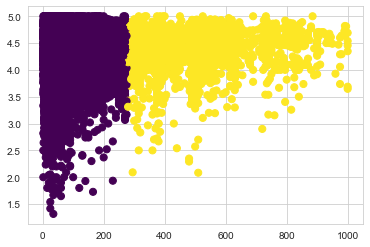

In [174]:
time_df=df[["rating","totalTimeVal"]]

kmeans = KMeans(n_clusters=2, random_state=0).fit(time_df)
y_kmeans = kmeans.predict(time_df)
plt.scatter(time_df.iloc[:, 1], time_df.iloc[:,0], c=y_kmeans, s=50, cmap="viridis")


In [175]:
user_ratingData={}
total_time={}
descrpt={}
short_time=[]
long_time=[]
data = df

for index, row in data.iterrows():
    if row["totalTimeVal"] < 20:
        short_time.append(row["rating"])
    elif row["totalTimeVal"]>700:
        long_time.append(row["rating"])
    descrpt.update({row["name"]:row["recipeIngredient"]})
    
print(len(short_time))
print(sum(short_time)/len(short_time))
print("--------------------")
print(len(long_time))
print(sum(long_time)/len(long_time))
    

3874
4.396718628440328
--------------------
265
4.424056198297842


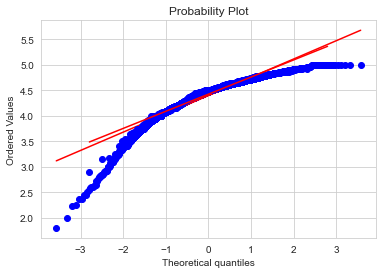

In [178]:
import pylab

stats.probplot(short_time, dist="norm", plot=pylab)
stats.probplot(long_time, dist="norm", plot=pylab)
plt.show()

/Users/ohadfisher/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ohadfisher/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


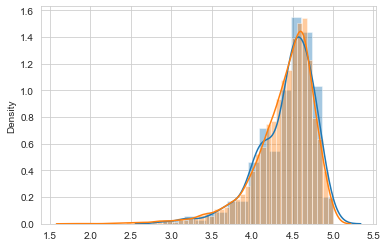

In [179]:
import seaborn as sns
ax=sns.distplot(long_time)
dx=sns.distplot(short_time)

All the blocks from here are statistics calculations 

In [180]:
stats.ttest_ind(long_time, short_time)

Ttest_indResult(statistic=1.135994884013929, pvalue=0.2560245083480421)

In [181]:
stats.ks_2samp(long_time, short_time)

KstestResult(statistic=0.07347386057022628, pvalue=0.1303320453285799)

In [182]:
stats.shapiro(long_time)

ShapiroResult(statistic=0.910666823387146, pvalue=1.8181666242012007e-11)

In [183]:
stats.shapiro(short_time)

ShapiroResult(statistic=0.8867537379264832, pvalue=0.0)

<h2> Section 3 </h2>

<h3>Calculate difficulty</h3>

In [184]:


df['instructionsCount'] = df['recipeInstructions'].apply(lambda x: len(x))
df['recipeCount'] = df['recipeIngredient'].apply(lambda x: len(x))

# create a new column for percentiles
df['pct_totalTimeVal'] = df['totalTimeVal'].rank(pct=True).apply(lambda x: float(x))
df['pct_recipeCount'] = df['recipeCount'].rank(pct=True).apply(lambda x: float(x))
df['pct_instructionsCount'] = df['instructionsCount'].rank(pct=True).apply(lambda x: float(x))
# create a new column for difficulty
df['difficulty'] = df['pct_instructionsCount'] * df['pct_recipeCount'] * df['pct_totalTimeVal']

In [185]:
pd.options.display.float_format = '{:20,.2f}'.format
df.round(4)
df['difficulty'].sort_values(ascending=True)
df['difficulty'].describe()

difficultyDict = {}
for index, row in df.iterrows(): 
    difficultyDict[row.RecId] = row.difficulty

In [186]:
filename=os.path.join(dirname,'./data/ratings.csv')
dfUsersRatings=pd.read_csv(filename)

In [187]:
filteredRatingsDf = dfUsersRatings[dfUsersRatings.recipeId.isin(df.RecId)]

In [188]:
filteredRatingsDf['difficulty'] = filteredRatingsDf['recipeId'].map(difficultyDict)


/var/folders/_m/zl1kl8b534jgc_mxmmmvzgbr0000gn/T/ipykernel_890/3994629935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredRatingsDf['difficulty'] = filteredRatingsDf['recipeId'].map(difficultyDict)


In [189]:
filteredRatingsDf

,userId,rating,recipeId,difficulty
0,3,5,23945,0.05
1,6,4,23945,0.05
5,14,5,161178,0.00
6,15,5,161178,0.00
7,17,5,161178,0.00
...,...,...,...,...
1923452,153110,5,16293,0.27
1923453,99619,5,16293,0.27
1923454,7227,3,16293,0.27
1923455,362781,5,16293,0.27


In [190]:
filteredRatingsByUser = filteredRatingsDf.groupby('userId').agg({'rating':'mean','recipeId': 'count', 'difficulty': 'mean'})
filteredRatingsByUser.rename(columns={'recipeId': 'recipes_count'}, inplace=True)


In [191]:

filteredRatingsByUser.reset_index(inplace=True)


In [192]:
filteredRatingsByUser['difficulty'].describe()


count              71,574.00
mean                    0.17
std                     0.06
min                     0.00
25%                     0.13
50%                     0.16
75%                     0.20
max                     0.59
Name: difficulty, dtype: float64

In [193]:

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
filteredRatingsByUser['difficulty'] = NormalizeData(filteredRatingsByUser['difficulty'])

In [194]:
filteredRatingsByUser['difficulty'].describe()

count              71,574.00
mean                    0.28
std                     0.09
min                     0.00
25%                     0.22
50%                     0.27
75%                     0.34
max                     1.00
Name: difficulty, dtype: float64

In [195]:
filteredRatingsByUser['difficulty']=np.where(filteredRatingsByUser['difficulty'] > 0.27 , 3, filteredRatingsByUser['difficulty'])
filteredRatingsByUser['difficulty']=np.where((filteredRatingsByUser['difficulty'] > 0.22) & (filteredRatingsByUser['difficulty'] < 3) , 2, filteredRatingsByUser['difficulty'])
filteredRatingsByUser['difficulty']=np.where(filteredRatingsByUser['difficulty'] < 2, 1, filteredRatingsByUser['difficulty'])
difficultyDict = {1: 'Easy', 2: 'Medium', 3: 'Hard'}

<AxesSubplot:>

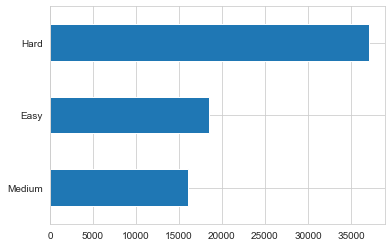

In [196]:
filteredRatingsByUser['difficulty'] = filteredRatingsByUser['difficulty'].map(difficultyDict)
filteredRatingsByUser.difficulty.value_counts().sort_values().plot(kind = 'barh')

In [197]:
x = filteredRatingsByUser.iloc[:, 2:3]
y = filteredRatingsByUser.iloc[:, 3:4]
x.head(10)

,recipes_count
0,136
1,241
2,26
3,57
4,13
5,2206
6,73
7,38
8,12
9,264


In [198]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=200)
knn.fit(x, y)


/Users/ohadfisher/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=200)

In [199]:
filteredRatingsByUser.head(10)

,userId,rating,recipes_count,difficulty
0,3,4.35,136,Medium
1,6,4.17,241,Medium
2,8,4.46,26,Easy
3,11,4.33,57,Easy
4,13,3.31,13,Hard
5,14,4.17,2206,Easy
6,15,4.41,73,Easy
7,17,4.89,38,Hard
8,18,4.42,12,Medium
9,20,3.79,264,Medium


In [200]:
dfOnlyParameters = filteredRatingsByUser.iloc[:,1:4]
dfOnlyParameters.head(10)

,rating,recipes_count,difficulty
0,4.35,136,Medium
1,4.17,241,Medium
2,4.46,26,Easy
3,4.33,57,Easy
4,3.31,13,Hard
5,4.17,2206,Easy
6,4.41,73,Easy
7,4.89,38,Hard
8,4.42,12,Medium
9,3.79,264,Medium


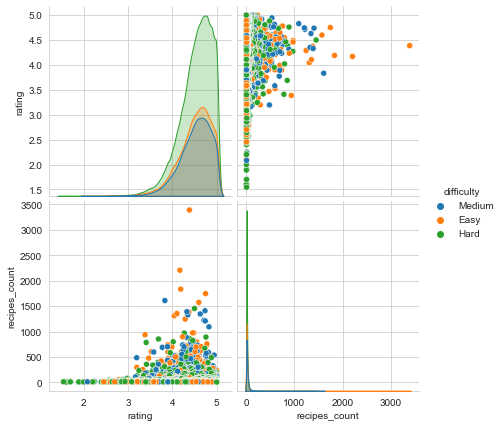

In [201]:
import seaborn as sns
plt.close();
sns.set_style('whitegrid');
sns.pairplot(dfOnlyParameters, hue='difficulty', height=3);
plt.show()


In [202]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

/Users/ohadfisher/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [203]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[ 687 2768  260]
 [1357 5456  540]
 [ 586 2386  275]]
Classification Report:
              precision    recall  f1-score   support

        Easy       0.26      0.18      0.22      3715
        Hard       0.51      0.74      0.61      7353
      Medium       0.26      0.08      0.13      3247

    accuracy                           0.45     14315
   macro avg       0.34      0.34      0.32     14315
weighted avg       0.39      0.45      0.40     14315

Accuracy: 0.4483409011526371


<h2>Section 4</h2>

In [204]:
categoriesPath=os.path.join(dirname,'./data/topCategories.json')
dfCategories=pd.read_json(categoriesPath)
dfCategories=dfCategories['name']

In [205]:
dfCategories.head(10)

0    Dessert Recipes               
1    Side Dish                     
2    World Cuisine Recipes         
3    Appetizers and Snack Recipes  
4    Main Dish Recipes             
5    Meat and Poultry Recipes      
6    Soups, Stews and Chili Recipes
7    Salad                         
8    Vegetables                    
9    Sauces and Condiments Recipes 
Name: name, dtype: object

In [206]:


dfCategoriesGroupBy = dict.fromkeys(dfCategories, [])
dfAllRecipies = []
for index, category in dfCategories.iteritems():
    for index2, recipe in df.iterrows():
        if(category in recipe['recipeCategory']):
            dfCategoriesGroupBy[category] = dfCategoriesGroupBy[category] + recipe['recipeIngredient']

In [207]:

for key in dfCategoriesGroupBy:
    dfCategoriesGroupBy[key] = (', '.join(dfCategoriesGroupBy[key]))
    dfAllRecipies.append(dfCategoriesGroupBy[key])

In [208]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
cv = CountVectorizer(analyzer= 'word', stop_words='english',max_features=20000, max_df=0.50)

# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(dfAllRecipies)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

count_vector=cv.transform(dfAllRecipies) 
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [209]:
feature_names = cv.get_feature_names_out()  

def get_top_10_tfidf(feature_names, categories, tfidf_vector, index):
    print('category: ' + categories[index])
    category_vector = tfidf_vector[index]
    df = pd.DataFrame(category_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
    df = df.loc[df['tfidf'] >= 0.1]
    print(df.sort_values(by=["tfidf"],ascending=True).tail(10))
    print('===================================\n')
for index in range(len(dfCategories)):
    get_top_10_tfidf(feature_names, dfCategories, tf_idf_vector, index)    


category: Dessert Recipes
                          tfidf
cookie                     0.14
frosting                   0.14
unwrapped                  0.16
bars                       0.18
peppermint                 0.18
double                     0.18
cookies                    0.19
rhubarb                    0.20
candy                      0.34
jell                       0.42

category: Side Dish
                        tfidf
collard                  0.15
yukon                    0.16
ears                     0.16
canning                  0.18
lids                     0.19
greens                   0.23
brussels                 0.23
sprouts                  0.23
grits                    0.29
pectin                   0.30

category: World Cuisine Recipes
                         tfidf
chuck                     0.13
steaks                    0.14
pounded                   0.15
lamb                      0.17
enchilada                 0.18
chops                     0.19
thighs               

<h2> Section 5</h1>

In [210]:
from sklearn.model_selection import train_test_split


# data understanding libraries
import matplotlib.pyplot as plt # ploting library
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter


# data preparation
import re
from nltk.stem import PorterStemmer


# ADS Creation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB

# Evaluation and Model Selection
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

In [211]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)  # or 199
pd.set_option('display.precision',150)
pd.options.display.float_format = '{:,.3f}'.format

/var/folders/_m/zl1kl8b534jgc_mxmmmvzgbr0000gn/T/ipykernel_890/2301483788.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)  # or 199


In [212]:
dfCategoriesIngredients = df[["recipeIngredient","category"]]
dfCategoriesIngredients.head(10)

,recipeIngredient,category
0,"[½ (16 ounce) jar creamy salad dressing, 1 clove garlic, minced, 1 cup grated Parmesan cheese, 1 (4 ounce) can chopped green chile peppers, 1 (14 ounce) can marinated artichoke hearts, drained and chopped, 3 green onions, chopped, 1 tomato, chopped]",appetizers and snacks
1,"[4 avocados - peeled, pitted and diced, 1 (8 ounce) package cream cheese, softened, 2 (16 ounce) containers cottage cheese, 1 onion, chopped, 1 (3 ounce) can chopped green chile peppers, ¼ cup salsa, 2 tablespoons garlic salt, 2 tablespoons fresh lemon juice, salt and pepper to taste]",appetizers and snacks
2,"[¼ cup olive oil, 1 large eggplant, peeled and coarsely chopped, 1 medium red bell pepper, cut into thin strips, 1 green bell pepper, cut into thin strips, 1 large onion, diced, 1 cup coarsely shredded carrot, salt to taste, crushed red pepper flakes]",appetizers and snacks
3,"[2 cups softened cream cheese, 1 (6.5 ounce) jar green or red pepper jelly, ¼ cup chopped pecans]",appetizers and snacks
4,"[1 (6 ounce) package dried cranberries, 1 cup chopped pistachio nuts, 1 (8 ounce) package cream cheese, softened, ½ cup butter, softened, 2 ounces crumbled blue cheese, 4 ounces Brie cheese, rind removed]",appetizers and snacks
5,"[½ cup milk, 3 tablespoons vegetable oil, ¼ teaspoon Worcestershire sauce, 1 dash hot pepper sauce, 1 cup cornmeal, ½ cup all-purpose flour, ¾ teaspoon salt, ¼ teaspoon baking soda]",appetizers and snacks
6,"[1 (8 ounce) package cream cheese, softened, .66 cup barbeque sauce, 3 tablespoons steak sauce, 1 (8 ounce) package fresh mushrooms, stems removed, ¼ cup bacon bits]",appetizers and snacks
7,"[2 heads iceberg lettuce, 1 tablespoon garlic powder, 1 tablespoon dried oregano, 1 (8 ounce) bottle Italian-style salad dressing, 1 pound thinly sliced cooked ham, 2 ½ pounds sliced provolone cheese, ½ pound Genoa salami, thinly sliced, ¼ pound Capacola sausage, sliced, ¼ pound pepperoni sausage, sliced, ¼ pound prosciutto, thinly sliced, ¼ pound thinly sliced roast beef, 1 cup fresh mushrooms, 1 (6 ounce) can marinated artichoke hearts, 1 (7 ounce) jar roasted red peppers, 1 (6 ounce) can sliced black olives, ¾ cup sliced pepperoncini peppers, 1 (5 ounce) jar sliced pimento-stuffed green olives, ½ cup crumbled Gorgonzola cheese, ½ pound mozzarella cheese, sliced, ¼ cup grated Parmesan cheese]",appetizers and snacks
8,"[10 ears corn, shucked and kernels removed, 1 ¼ cups butter, 2 ½ cups lime juice, 2 ½ cups crema Mexicana (Mexican cream), 1 teaspoon chili powder, or to taste, salt to taste, 1 ¼ cups crumbled cotija cheese, 1 dash hot pepper sauce (such as Valentina®), or to taste, 10 wedges fresh lime]",appetizers and snacks
9,"[1 (8 ounce) package cream cheese, softened, 1 (8 ounce) container sour cream, ½ cup mayonnaise, 1 (1 ounce) package ranch dressing mix, 18 green onions, chopped, 1 jalapeno pepper, seeded and minced]",appetizers and snacks


In [213]:
import re
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
 
 

dfCategoriesIngredients['ingredients_string'] = [', '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) 
                                         for line in lists]).strip() for lists in dfCategoriesIngredients['recipeIngredient']]
                                    
train, test = train_test_split(dfCategoriesIngredients, test_size=0.2)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ohadfisher/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/var/folders/_m/zl1kl8b534jgc_mxmmmvzgbr0000gn/T/ipykernel_890/1996574667.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCategoriesIngredients['ingredients_string'] = [', '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line))


In [214]:
train_vectorizer = TfidfVectorizer(stop_words='english',
                             ngram_range = ( 1 , 1 ),
                             analyzer="word", 
                             max_df = .57 , 
                             binary=False , 
                             token_pattern=r'\w+' , 
                             sublinear_tf=False)
test_vectorizer = TfidfVectorizer(stop_words='english')

In [215]:
from sklearn.model_selection import train_test_split

# create corpus based on newly processed data

train_corpus = train['ingredients_string']
test_corpus = test['ingredients_string']

# transform the corpus to a dense matrix representation
train_tfidf = train_vectorizer.fit_transform(train_corpus).todense()
test_tfidf = train_vectorizer.transform(test_corpus)

In [216]:
train_predictor = train_tfidf
test_predictor = test_tfidf

train_target = train[['category']]

In [217]:
from sklearn.preprocessing import LabelEncoder

category = LabelEncoder()

# encoding 'category'
category.fit(train_target)
encoded_categories_new_train = category.transform(train_target)
train_target = encoded_categories_new_train


/Users/ohadfisher/Library/Python/3.8/lib/python/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ohadfisher/Library/Python/3.8/lib/python/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [218]:

X_train, X_val, y_train, y_val = train_test_split(train_predictor, train_target, test_size = 0.2, random_state = 0, stratify = train_target)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(22020, 3552) (22020,)
(5506, 3552) (5506,)


In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# defining model
classifier = LogisticRegression(solver='liblinear')

# fit the model
classifier.fit(X_train, y_train)

# predicting X_val
y_pred = classifier.predict(X_val)

# evaluating
print(classification_report(y_val, y_pred))

/Users/ohadfisher/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


              precision    recall  f1-score   support

           0       0.71      0.51      0.59       459
           1       0.00      0.00      0.00        17
           2       0.69      0.75      0.71       300
           3       0.50      0.17      0.26       115
           4       0.70      0.93      0.80       844
           5       0.00      0.00      0.00        66
           6       0.87      0.82      0.85       160
           7       0.50      0.04      0.07       105
           8       0.00      0.00      0.00        64
           9       0.00      0.00      0.00        24
          10       0.00      0.00      0.00        38
          11       0.50      0.05      0.09        63
          12       0.00      0.00      0.00         1
          13       0.73      0.92      0.81      2015
          14       0.00      0.00      0.00        29
          15       0.00      0.00      0.00         9
          16       0.70      0.65      0.67       309
          17       0.00    

/Users/ohadfisher/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ohadfisher/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ohadfisher/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

In [220]:
# defining model
best_classifier = LogisticRegression(solver='liblinear', C = 7)

# fit the model
best_classifier.fit(X_train, y_train)

# predicting X_val
y_pred = best_classifier.predict(X_val)

# evaluating
print(classification_report(y_val, y_pred))

/Users/ohadfisher/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


              precision    recall  f1-score   support

           0       0.72      0.58      0.64       459
           1       0.00      0.00      0.00        17
           2       0.68      0.72      0.70       300
           3       0.40      0.27      0.32       115
           4       0.73      0.92      0.81       844
           5       0.75      0.05      0.09        66
           6       0.85      0.83      0.84       160
           7       0.38      0.11      0.18       105
           8       0.00      0.00      0.00        64
           9       0.00      0.00      0.00        24
          10       0.50      0.03      0.05        38
          11       0.62      0.21      0.31        63
          12       0.00      0.00      0.00         1
          13       0.77      0.90      0.83      2015
          14       0.00      0.00      0.00        29
          15       0.00      0.00      0.00         9
          16       0.70      0.65      0.67       309
          17       0.00    

/Users/ohadfisher/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ohadfisher/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ohadfisher/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

In [221]:
predicted_category = best_classifier.predict(test_predictor)

In [222]:
predicted_category = category.inverse_transform(predicted_category)
predicted_category

array(['appetizers and snacks', 'everyday cooking', 'desserts', ...,
       'soups, stews and chili', 'appetizers and snacks',
       'soups, stews and chili'], dtype=object)

In [223]:
result = pd.DataFrame({'category': test['category'],
                           'predicted_category': predicted_category})

In [224]:
result.head(10)

,category,predicted_category
937,appetizers and snacks,appetizers and snacks
23526,everyday cooking,everyday cooking
16527,desserts,desserts
32920,"fruits, vegetables and other produce",main dishes
1830,appetizers and snacks,main dishes
23982,side dishes,side dishes
37066,desserts,desserts
7563,desserts,desserts
36846,bread recipes,desserts
38188,desserts,desserts
